# Loan Prediction

El siguiente ejercicio es sobre una fuente de datos proveniente de Analytics Vidhya (https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#problem_statement)

El problema es sobre el otorgamiento de un préstamo a los clientes, los cuales pueden ser hombres o mujeres, casados o no, con o sin hijos, su nivel de escolaridad, tipo de empleo, ingreso, monto del crédito, historial de crédito, y localdiad, con la finalidad de poder determinar si se otorga o no el crédito (Yes/No). Con la finalidad de poder hacer un análisis, obtenemos 2 bases de datso. Una de ellas es una base de entrenamiento a la cual llamraremos "train", y la otra una base de validación a la cual llamaremos "test"

# Descripción de las bases

In [112]:
import pandas as pd
import numpy as np

train=pd.read_csv('train.csv', encoding='utf-8')
test=pd.read_csv('test.csv', encoding='utf-8')

In [2]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Podemos ver los 5 primeros registros de la base "Train", la cual está a nivel de Loan_ID, como variable de identificación.

In [3]:
train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

La base "Train" tiene 614 observaciones y cuenta con 12 variables (demás del Loan_ID), las cuales son:

In [4]:
index_vars=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
vars_desc=pd.DataFrame(np.nan, index=index_vars, columns = ['Descripción','Tipo de dato'])

vars_desc.loc['Loan_ID','Descripción']='Variable identificadora del crédito'
vars_desc.loc['Gender','Descripción']='Género del solicitante'
vars_desc.loc['Married','Descripción']='Estado Civil'
vars_desc.loc['Dependents','Descripción']='Número de dependientes'
vars_desc.loc['Education','Descripción']='Nivel educativo (graduado/no graduado)'
vars_desc.loc['Self_Employed','Descripción']='Propio negocio (Sí/No)'
vars_desc.loc['ApplicantIncome','Descripción']='Ingreso del aplicante'
vars_desc.loc['CoapplicantIncome','Descripción']='Ingreso del coaplicante'
vars_desc.loc['LoanAmount','Descripción']='Monto del crédito (en miles)'
vars_desc.loc['Loan_Amount_Term','Descripción']='PLazo en meses'
vars_desc.loc['Credit_History','Descripción']='Historial crediticio'
vars_desc.loc['Property_Area','Descripción']='Localidad (urbana/rural/semi urbana)'
vars_desc.loc['Loan_Status','Descripción']='Aprobación del crédito (Sí/No)'

vars_desc.loc['Loan_ID','Tipo de dato']=train['Loan_ID'].dtypes
vars_desc.loc['Gender','Tipo de dato']=train['Gender'].dtypes
vars_desc.loc['Married','Tipo de dato']=train['Married'].dtypes
vars_desc.loc['Dependents','Tipo de dato']=train['Dependents'].dtypes
vars_desc.loc['Education','Tipo de dato']=train['Education'].dtypes
vars_desc.loc['Self_Employed','Tipo de dato']=train['Self_Employed'].dtypes
vars_desc.loc['ApplicantIncome','Tipo de dato']=train['ApplicantIncome'].dtypes
vars_desc.loc['CoapplicantIncome','Tipo de dato']=train['CoapplicantIncome'].dtypes
vars_desc.loc['LoanAmount','Tipo de dato']=train['LoanAmount'].dtypes
vars_desc.loc['Loan_Amount_Term','Tipo de dato']=train['Loan_Amount_Term'].dtypes
vars_desc.loc['Credit_History','Tipo de dato']=train['Credit_History'].dtypes
vars_desc.loc['Property_Area','Tipo de dato']=train['Property_Area'].dtypes
vars_desc.loc['Loan_Status','Tipo de dato']=train['Loan_Status'].dtypes

print(vars_desc)

                                              Descripción Tipo de dato
Loan_ID               Variable identificadora del crédito       object
Gender                             Género del solicitante       object
Married                                      Estado Civil       object
Dependents                         Número de dependientes       object
Education          Nivel educativo (graduado/no graduado)       object
Self_Employed                      Propio negocio (Sí/No)       object
ApplicantIncome                     Ingreso del aplicante        int64
CoapplicantIncome                 Ingreso del coaplicante      float64
LoanAmount                   Monto del crédito (en miles)      float64
Loan_Amount_Term                           PLazo en meses      float64
Credit_History                       Historial crediticio      float64
Property_Area        Localidad (urbana/rural/semi urbana)       object
Loan_Status                Aprobación del crédito (Sí/No)       object


Ahora veamos cuántos valores ausentes se encuentran en la base "Train":

In [113]:
def num_nulos(x):
  return x.isnull().sum()

print("Missings por columna de la base Train: ")
print(train.apply(num_nulos, axis=0))

Missings por columna de la base Train: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [114]:

print("Missings por columna de la base Train: ")
print(train.apply(num_nulos, axis=1))

Missings por columna de la base Train: 
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     2
20     0
21     0
22     0
23     1
24     2
25     0
26     0
27     0
28     0
29     1
      ..
584    0
585    0
586    0
587    0
588    1
589    0
590    0
591    0
592    1
593    0
594    0
595    0
596    0
597    1
598    0
599    0
600    2
601    1
602    0
603    0
604    0
605    1
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64


Podemos ver que, además del Loan_ID, hay 5 variables que no tienen valores ausentes, la variable Married tiene el menor número de valores ausentes y la de Credit_History es la que más tiene, al tener 50 valores ausentes.

Ahora veamos lo mismo con la base "Test":

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


La base "Test" también está a nivel Loan_ID, sin embargo, podemos ver que no cuenta con la variable Loan_Status, por lo cual, la variable objetivo no se encuentra en esta parte del dataframe

In [7]:
test.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

La base "Test" tiene 11 columnas, las cuales son las mismas que tiene "Train", pero sin la variable objetivo Loan_Status. La base cuenta con 367 observaciones

In [8]:
print("Missings por columna de la base Test: ")
print(test.apply(num_nulos, axis=0))

Missings por columna de la base Test: 
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Nuevamente la base de validación "Test" tiene la variable de Credit_History con mayor número de valores ausentes, 29.

Para ambas bases procedemos a eliminar las filas que tengan un valor ausente en alguna columna

# Quitamos valores ausentes

In [5]:
train.dropna(inplace=True)
print(train.count())

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64


De las 614 observaciones que tenía la base "Train", nos quedamos con 480 observaciones que NO tienen valores ausentes en ninguna de las columnas.

In [6]:
test.dropna(inplace=True)
print(test.count())

Loan_ID              289
Gender               289
Married              289
Dependents           289
Education            289
Self_Employed        289
ApplicantIncome      289
CoapplicantIncome    289
LoanAmount           289
Loan_Amount_Term     289
Credit_History       289
Property_Area        289
dtype: int64


De la misma forma, de las 367 observaciones que tenía la base "Test", nos quedamos con 289, las cuales no tienen valores ausentes en ninguna de las columnas.

A continuación haremos un descriptivo de ambas bases

# Estadísticos descriptivos

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Para la base "Train" podemos ver que el Ingreso promedio del aplicante es de 5,364 dólares y la mediana es de 3,859 dólares; el ingreso promedio del coaplicante es de 1,581 dólares y la mediana es de 1,084 dólares. El monto de la deuda promedio es de 144 mil dólares y la mediana es de 128 mil dólares; el plazo promedio de la deuda es de 342 meses y la mediana es de 360 meses (suena a crédito hipotecario, por el monto y por el plazo); y desde el percentil 25, la población tiene historial crediticio.

In [12]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830
std,4790.683934,2377.599209,59.699582,65.655503,0.366469
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


Para la base de validación, el ingreso promedio del aplicante e de 4,637 dólares, y la mediana de 3,833 dólares (sólo la mediana se asemeja a la de la base Train); el ingreso promedio del coaplicante es de 1,528 dólares y la mediana de 879 dólares; el monto promedio del crédito es de 136 mil dólares y la mediana de 126 mil dólares; el plazo promedio es de 324 meses y una mediana de 360 meses; desde el percetil 25 la población cuenta con historial crediticio.

# Variables categóricas

In [13]:
print(train['Gender'].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64


Podemos ver que la variable Gender tiene 2 valores: Male y Female. Si los reemplazamos con 1 para Male y 0 para Female tenemos:

In [7]:
train.replace('Male',1, inplace=True)
train.replace('Female',0, inplace=True)
print(train['Gender'].value_counts())

1    394
0     86
Name: Gender, dtype: int64


In [14]:
print(train['Married'].value_counts())

Yes    311
No     169
Name: Married, dtype: int64


La variable Married tiene 2 valores: Yes/No, si los reemplazamos por 1 para Yes y 0 para No tenemos:

In [8]:
train.replace('Yes',1, inplace=True)
train.replace('No',0, inplace=True)
print(train['Married'].value_counts())

1    311
0    169
Name: Married, dtype: int64


In [15]:
print(train['Dependents'].value_counts())

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


La variable Dependents tiene valores del 0, 1, 2 y 3+ para el número de hijos. Reemplazando por valores del 0 al 3 tenemos:

In [9]:
train.replace('0',0, inplace=True)
train.replace('1',1, inplace=True)
train.replace('2',2, inplace=True)
train.replace('3+',3, inplace=True)
print(train['Dependents'].value_counts())

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64


In [16]:
print(train['Education'].value_counts())

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


La variable Education tiene valores de Graduate, Not Graduate, que si los reemplazamos por 1 y 0 respectivamente tenemos:

In [12]:
train.replace('Graduate',1, inplace=True)
train.replace('Not Graduate',0, inplace=True)
print(train['Education'].value_counts())

1    383
0     97
Name: Education, dtype: int64


In [17]:
print(train['Self_Employed'].value_counts())

No     414
Yes     66
Name: Self_Employed, dtype: int64


La variable Self Employed tiene 2 valores Yes/No que reemplazándolos por 1 y0 respectivamente tenemos:

In [10]:
train.replace('Yes',1, inplace=True)
train.replace('No',0, inplace=True)
print(train['Self_Employed'].value_counts())

0    414
1     66
Name: Self_Employed, dtype: int64


In [18]:
print(train['Property_Area'].value_counts())

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


La variable Property Area tiene 3 valores Semiurban/Urban/Rural, que los reemplazaremos por 0,1 y 2 respectivamente.

In [13]:
train.replace('Semiurban',0, inplace=True)
train.replace('Urban',1, inplace=True)
train.replace('Rural',2, inplace=True)
print(train['Property_Area'].value_counts())

0    191
1    150
2    139
Name: Property_Area, dtype: int64


In [19]:
print(train['Loan_Status'].value_counts())

Y    332
N    148
Name: Loan_Status, dtype: int64


Finalmente la variable Loan Status que es la variable objetivo, tiene 2 valores Y/N, reemplazándolos por 1 y 0 respectivamente tenemos:

In [22]:
train.replace('Y',1, inplace=True)
train.replace('N',0, inplace=True)
print(train['Loan_Status'].value_counts())

1    332
0    148
Name: Loan_Status, dtype: int64


# Tablas Cruzadas

A continuación haremos una tabla cruzada de las variables Género y Loan_Status para saber a quién se le da más crédito, si a hombre o mujeres

In [56]:
pd.crosstab([train.Gender],train.Loan_Status,margins=True, normalize=False)

Loan_Status,0,1,All
Gender,,,
0,32,54,86
1,116,278,394
All,148,332,480


Podemos ver que de los 394 hombre, a 278 se les da crédito, y de las 86 mujeres, a 54 se les da crédito.

In [57]:
pd.crosstab([train.Gender],train.Loan_Status,margins=True, normalize='index')

Loan_Status,0,1
Gender,,
0,0.372093,0.627907
1,0.294416,0.705584
All,0.308333,0.691667


En porcentaje (y para BONUS), al 70% de los hombres se les da crédito y al 62% de las mujeres se les da crédito.

Ahora veamos si tener un historial crediticio hace que la aprobación del crédito sea mayor:

In [58]:
pd.crosstab([train.Credit_History],train.Loan_Status,margins=True, normalize=False)

Loan_Status,0,1,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


De los 480 aplicantes a 325 personas que tenían historial crediticio se les otorgo el credito y solo a 7 personas que no tenian historial crediticio se les otorgo el credito.

In [59]:
pd.crosstab([train.Credit_History],train.Loan_Status,margins=True, normalize='index')

Loan_Status,0,1
Credit_History,,
0.0,0.900000,0.100000
1.0,0.207317,0.792683
All,0.308333,0.691667


Al 70% de los que tienen historial crediticio se les otorga el crédito y solo al 10% de los que no tienen se les otorga tambien el credito.

# Graficas

In [60]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

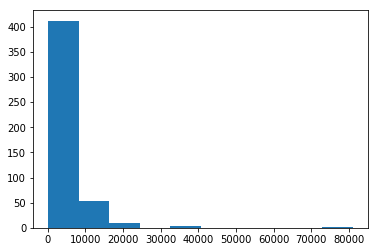

In [62]:
plt.hist(train.ApplicantIncome) 
plt.show

Como podemos ver la mayoria de las personas tienen un ingreso de hasta 10,000 dolares o menor. 

<function matplotlib.pyplot.show(*args, **kw)>

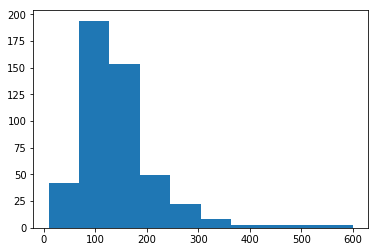

In [63]:
plt.hist(train.LoanAmount) 
plt.show

La mayoria de las personas piden un monto de prestamos menor a 200 mil dolares, viendo ambas graficas es factible pensar que a mayor ingreso tambien es mayor el monto del prestamo otorgado.

# Boxplot

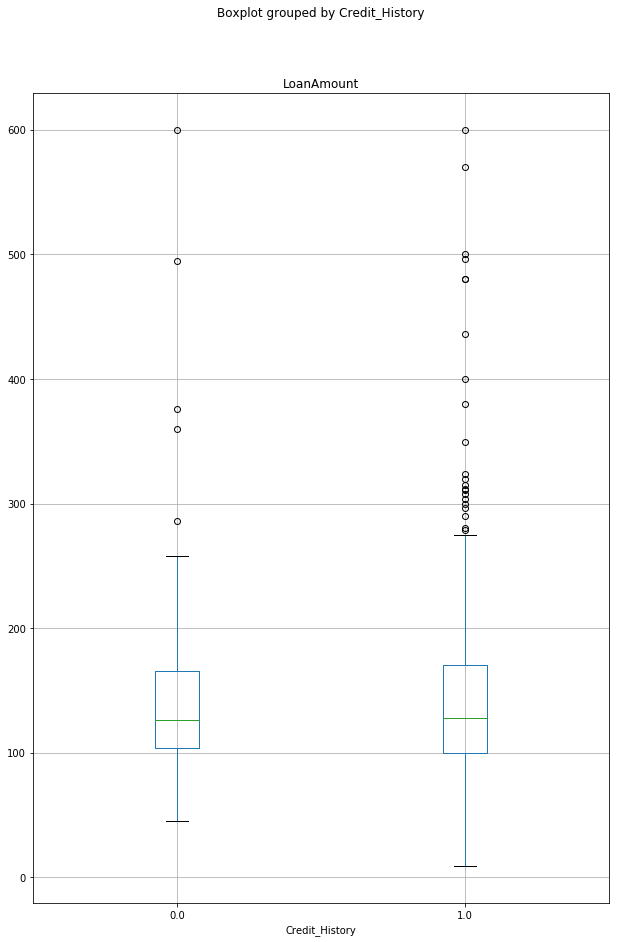

In [108]:
train.boxplot(['LoanAmount'],by='Credit_History',figsize=(10,15))

Podemos ver que los solicitantes que tienen historial crediticio hay mas clientes potenciales a solicitar montos de crédito mas altos que los que no tienen historial crediticio. Sin embargo, en distribución del percentil 25 al 75 lucen prácticamente iguales.

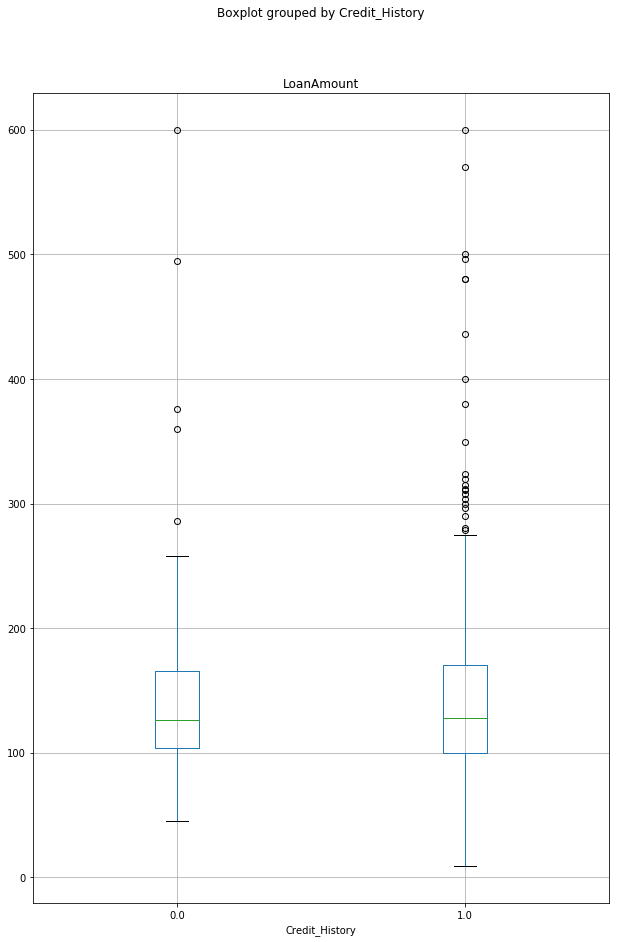

In [109]:
train.boxplot(['LoanAmount'],by='Credit_History',figsize=(10,15))

Ahora viendo a los solicitantes por género, vemos que los hombres y mujeres tienen una distribución parecida entre los percentiles 25 y 75, incluso en la mediana (raya verde). Sin embargo, hay más hombres potenciales a solicitar montos de crédito más altos que lo que solicitan las mujeres.